In [1]:
import pandas as pd

In [2]:
P_df = pd.read_excel('(정치)NewsResult_20180101-20221231.xlsx')
E_df = pd.read_excel('(경제)NewsResult_20180101-20221231.xlsx')
S_df = pd.read_excel('(사회)NewsResult_20180101-20221231.xlsx')
T_df = pd.read_excel('(기술)NewsResult_20180101-20221231.xlsx')

In [3]:
from konlpy.tag import Mecab
from tqdm import tqdm

from gensim.models.ldamodel import LdaModel
from gensim.models.callbacks import CoherenceMetric
from gensim import corpora
from gensim.models.callbacks import PerplexityMetric
from gensim.models.coherencemodel import CoherenceModel

import logging
import pickle
import pyLDAvis.gensim
import re
import matplotlib.pyplot as plt

/opt/conda/lib/python3.8/site-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.9 it will stop working
  from collections import Iterable
/opt/conda/lib/python3.8/site-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.9 it will stop working
  from collections import Mapping


In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
import itertools

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [45]:
import re

import matplotlib.pyplot as plt
import gensim
import tqdm

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [40]:
def display_topics(model, feature_names, num_top_words):
    for topic_index, topic in enumerate(model.components_):
        print('Topic #', topic_index)

        # components_ array에서 가장 값이 큰 순으로 정렬했을 때, 그 값의 array index를 반환. 
        topic_word_indexes = topic.argsort()[::-1]
        top_indexes=topic_word_indexes[:num_top_words]
        
        # top_indexes대상인 index별로 feature_names에 해당하는 word feature 추출 후 join으로 concat
        feature_concat = ' '.join([feature_names[i] for i in top_indexes])                
        print(feature_concat)

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### P(정치)

In [49]:
re.sub(',', ' ', P_df['키워드'][0])

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'국회 민생 외면 동료 방탄 처리 일몰 법안 약속 국회 약속 민생 방탄 동료 의원 몰두 비난 본회의 이날 국회 민생 직결 일몰법안 상정 체포동의안 노웅래 더불어민주당 의원 체포 동의 부결 국회의원 체포 동의 부결 국회 이날 본회의 일몰연장 무산 법안 안전운임제 추가연장근로제 건강보험국고지원 법안들 건강 보험 국고 지원 법안 통과 연내 본회의 사실 무산 제도 당장 내년 폐기 수순 전망 국회 연내 일몰 법안 처리 약속 현장 혼란 화물차 운전자 최저 임금 역할 안전운임제 폐지 화물차 운전자 위험운행 가능성 운송료 수입 화물연대 화물차 운전자 하루 시간 운전 장시간 과속 운전 사고 한국도로공사 고속도 화물차 사고원 1~3위 졸음 42% 태만 34% 과속 8% 운전 애초 정부 여당 화물연대 연장안 일몰 연장 제시 파업 입장 철회 방침 제도 야당 민주당 정부 여당 애초 약속 주장 진전 상황 추가연장근로제 일몰연장 불발 중소기업계 발등 분위기 미만 사업장 추가 근로 한시적 허용 제도 영세기업들 범법자 생산량 근로자들 임금 감소 예상 법안 여론 주목도 일몰 항목 포함 지방세관계법 지방세5법 개정안 국회 처리 감감무소식 법안 농업 사회복지 문화관광 수송교통 국토항 일몰항목 분야 일몰 항목 포함 국민들 실생활 연관 국회 외면 민생현장 곡소리 여야 일몰 연장 무산 공방 주호영 국민 원내대표 본회의 연장근로제 일몰 업체들 미만 업체 혼란 전적 민주당 고집 몽니 주장 원내대표 박홍근 민주당 원내 대표 국민 생명 안전 노동자 생명권 법안 정부여당 대통령 경호법 노조 응징법 비판'

In [50]:
P_tokenized = [re.sub(',', ' ', P_df['키워드'][i]) for i in range(len(P_df))]
P_feat_vect = count_vectorizer.fit_transform(P_tokenized)

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [51]:
lda = LatentDirichletAllocation(n_components=6)
lda.fit(P_feat_vect)

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LatentDirichletAllocation(n_components=6)

In [52]:
# CountVectorizer객체내의 전체 word들의 명칭을 get_features_names( )를 통해 추출
feature_names = count_vectorizer.get_feature_names()

# Topic별 가장 연관도가 높은 word를 10개만 추출
display_topics(lda, feature_names, 20)

Topic # 0
트럼프 미사일 트럼프 대통령 바이든 추석 일본 원전 기후 미군 달러 연휴 코로나19 안보 위협 대만 외교 발사 총리 러시아 명절
Topic # 1
박정희 광주 청년 혁신 호남 개혁 극복 소득 박정희 대통령 후보 이날 보수 출마 디지털 기본 교육 육성 일본 경쟁 창출 이재명 더불어민주당
Topic # 2
개성 회담 통일 김정은 대북 제재 경의선 관광 정상 회담 교류 판문점 올림픽 경협 동해선 북측 강원도 남한 금강산 정상회담 원산
Topic # 3
증액 예산안 대구 지역구 경북 심사 예타 공항 법안 soc 면제 가덕도 대전 충북 예비 총선 재정 특별법 한국당 세종
Topic # 4
통행료 국토부 주택 사고 운송 세종시 서울시 화물 부총리 지하 파업 연장 연대 거부 노선 한국도로공사 경부고속도로 업무 지하화 화물 연대
Topic # 5
검찰 수사 대장동 징계 후보자 원내 사장 혐의 법관 언론 회장 문건 투표 원내대표 권력 한국당 탄핵 경찰 수사관 변호사


/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [76]:
perplexity_values = []

for i in tqdm.tqdm_notebook(range(10, 25)):
  ldamodel = LatentDirichletAllocation(n_components=i).fit(feat_vect).perplexity(P_feat_vect)
  perplexity_values.append(ldamodel)

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-76-2ff7ca29eb32>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm.tqdm_notebook(range(10, 25)):


  0%|          | 0/15 [00:00<?, ?it/s]

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


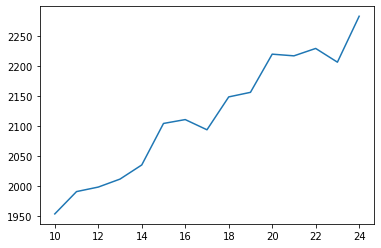

In [77]:
x = range(10, 25)
plt.plot(x, perplexity_values)
plt.show()

In [78]:
lda = LatentDirichletAllocation(n_components=23)
lda.fit(P_feat_vect)

display_topics(lda, feature_names, 20)

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic # 0
항목 레이더 고급 무료 체계 왕복 유럽 지점 lg 최소화 경쟁 입력 단위 소요 무상 사장 평균 대한민국 최소 조치
Topic # 1
치료제 추천 연구개발 솔루션 제공 공공 실험 소형 역사 통과 가지 마지막 신형 지식 편의점 의료 정체 제품 생산 연비 실현 연간
Topic # 2
임베디드 소프트웨어 로보택시 옵션 얘기 추월 고객들 인력 업무 점포 프랑스 추돌 논란 정확 교환 움직임 헬스 케어 무료 전파 이스라엘 확산
Topic # 3
계기판 현대모비스 차원 민간 번째 특별 인간 전장 느낌 웨이모 점검 바람 법인 조정 콘텐트 전송 소비 대학 보험 기지국
Topic # 4
경매 오른쪽 매출 40 독자 구분 예약 덕분 요청 구조 가상현실 커넥티드카 오토 예측 시승 계기 통제 유도 지분 지속적
Topic # 5
테마 충전소 영업 매출 코로나 먼지 테스트 개념 평소 프로그램 대화 발휘 오프라인 적극 모터 30 아프리카 종합 배달 특화
Topic # 6
ota 뉴딜 눈길 군집 개인 정보 자금 전면 정책 드론 다운로드 인수 표현 고속도로 주행 건물 완벽 거래 가입 트래픽 무선 문화
Topic # 7
산업 혁명 가솔린 덕분 요금 고속 데이터 경제 최적 유치 요소 편리 달성 상승 2년 교체 차이 석회 가지 입장 체험 레벨
Topic # 8
규정 승차감 동의 이용료 이탈 회의 여행 민간 데이터 고속도로 이용자 수도권 연휴 기간 규제 동영상 카드 이해 완성 업체 좌석 중앙 도움
Topic # 9
독일 무료 모듈 북한 도달 목적지 효율적 기계 반영 접속 건강 보장 보조금 별도 스마트시티 이야기 자사 반도체 보급 빅데이터
Topic # 10
기회 이달 시티 라디에이터 영역 커넥티드 배치 치열 나라 하드웨어 자원 서울시 보장 터보 평창 tv 공식 과장 비중 휴대
Topic # 11
확산 hud 제시 가입자 트렁크 레벨 수준 비중 넷플릭스 모빌리티 제약 iot 노블레스 최고 출력 핸들 기회 해결 드라이빙 트림 터널 벤츠
Topic # 12
헬스 운전자 개입 수도 vr 버

### E(경제)

In [57]:
E_tokenized = [re.sub(',', ' ', E_df['키워드'][i]) for i in range(len(E_df))]
E_feat_vect = count_vectorizer.fit_transform(E_tokenized)

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [59]:
lda = LatentDirichletAllocation(n_components=6)
lda.fit(E_feat_vect)

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LatentDirichletAllocation(n_components=6)

In [60]:
# CountVectorizer객체내의 전체 word들의 명칭을 get_features_names( )를 통해 추출
feature_names = count_vectorizer.get_feature_names()

# Topic별 가장 연관도가 높은 word를 10개만 추출
display_topics(lda, feature_names, 20)

Topic # 0
자율 자율 주행 자율주행 사고 테슬라 중국 트럭 자율주행차 주행차 자율 주행차 에너지 레벨 주유소 배터리 센서 모빌리티 사람 화재 독일 bmw
Topic # 1
수소 충전소 일자리 에너지 반도체 수소차 부품 국가 중국 보급 혁신 전환 연료 예산 드론 발전 공장 충전기 사회 프로젝트
Topic # 2
가솔린 충돌 연비 제네시스 세단 하이브리드 출력 기아차 시트 디젤 시승 느낌 트림 차체 등급 신형 사양 터보 모습 모드
Topic # 3
통행료 연휴 할인 추석 코로나19 인하 대책 결제 감소 지급 요금 면제 공사 시행 인상 매장 영위 카드 혜택 은행
Topic # 4
토지 상가 지식 지식산업센터 지식 산업 산업 센터 판교 타이어 업무 그린벨트 매각 상업 점검 타워 연면적 부지 상업시설 건물 땅값 조합
Topic # 5
오피스텔 gtx 교통망 전용면적 공원 임대 광역 힐스테이트 호재 분양가 수요자들 도보 검단 용인 연장 집값 lh 커뮤니티 양주 84


/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [79]:
perplexity_values = []

for i in tqdm.tqdm_notebook(range(10, 25)):
  ldamodel = LatentDirichletAllocation(n_components=i).fit(feat_vect).perplexity(E_feat_vect)
  perplexity_values.append(ldamodel)

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-79-caa090db4b56>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm.tqdm_notebook(range(10, 25)):


  0%|          | 0/15 [00:00<?, ?it/s]

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


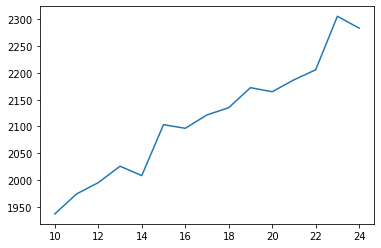

In [80]:
x = range(10, 25)
plt.plot(x, perplexity_values)
plt.show()

In [82]:
lda = LatentDirichletAllocation(n_components=22)
lda.fit(E_feat_vect)

display_topics(lda, feature_names, 20)

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic # 0
고속 다수 평소 스마트 크루즈 목소리 하드웨어 방역 아이오닉 뉴딜 단위 입장 시설 생산 업체 lg 헤드 허용 선언 지정 서버 로보택시
Topic # 1
전장 매출 흐름 공공 본격적 측면 skt gv70 모양 반영 v2x 수집 통행료 조정 무료 검사 컬러 유럽 페이스북 단속
Topic # 2
완성 업체 lg유플러스 지분 지속 지불 사건 건강 얘기 과학기술정보통신부 영역 긴급 기지국 공항 현대자동차 트래픽 개방 업무 사업자 건물 솔루션 제공
Topic # 3
추석 정차 가량 동력 바퀴 기록 통신 서비스 실현 블랙박스 전송 세계적 프레스티지 콘텐트 날씨 mbps 질문 추세 동물용 의약품 급증 scc
Topic # 4
일본 효율적 동영상 접근 할당 컨트롤 스마트 비행 시야 대표적 점검 차세대 구동 iot 고속도로 주행 교환 비전 배송 서버 한국도로공사 일상
Topic # 5
시행 시티 노블레스 만족 영국 소음 가동 신고 진료 차례 세계적 독일 움직임 발휘 부사장 최신 경쟁력 kg 시내 재난
Topic # 6
미납 제작 도어 바이오 의무 발굴 운전대 레이더 치료제 제시 사례 드론 전문가 제약 오토 신차 소재 경찰 커넥티드카 폭스바겐
Topic # 7
클러스터 택시 검토 소통 솔루션 sk 텔레콤 보조금 ict 승용차 자율주행 자율 cctv 대표적 날씨 승인 자연 전문가 자원 편의성 맞춤 프랑스
Topic # 8
온도 그동안 음성 지시 부처 위원회 개별 불법 카카오 중형 달성 금액 변속 사회 정책 전기차 전용 로보택시 창업 자료 국산
Topic # 9
톨게이트 동급 형성 협업 운전자들 충돌 방지 방지 보조 인공 지능 마지막 출발 전문가 소형 주차 화폐 주행 가능 급속 순간 마력 보조금 대체
Topic # 10
타입 사망자 트럭 국회 레벨 수준 직원 사업자 보험 보안 하루 그랜저 사물 결정 개정안 동의 사운드 사용자 현대차그룹 선정 운전대
Topic # 11
매체 영국 프레스티지 아프리카 레벨 자율 최신 가입자 신고 정확 충전소 램프 효율 시내 사회 여행 

### S(사회)

In [64]:
S_tokenized = [re.sub(',', ' ', E_df['키워드'][i]) for i in range(len(S_df))]
S_feat_vect = count_vectorizer.fit_transform(S_tokenized)

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [65]:
lda = LatentDirichletAllocation(n_components=6)
lda.fit(S_feat_vect)

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LatentDirichletAllocation(n_components=6)

In [66]:
# CountVectorizer객체내의 전체 word들의 명칭을 get_features_names( )를 통해 추출
feature_names = count_vectorizer.get_feature_names()

# Topic별 가장 연관도가 높은 word를 10개만 추출
display_topics(lda, feature_names, 20)

Topic # 0
등급 제네시스 주유소 차종 현대차그룹 gv80 기아 아이오닉 지식 iihs 경차 현대 지식 산업 지식산업센터 베트남 산업 센터 요소수 ev6 tsp 배터리
Topic # 1
추석 통행료 연휴 할인 대책 감소 드론 지급 요금 버스 결제 인상 물가 매장 매출 화물차 금융 전년 코로나 인하
Topic # 2
자율 자율 주행 테슬라 자율주행 레벨 트럭 모빌리티 소프트웨어 부품 자율주행차 주행차 자율 주행차 센서 카메라 솔루션 adas 완전 통신 데이터 스마트카
Topic # 3
수소 충전소 중국 반도체 수소차 연료 일자리 보급 충전기 부품 공장 후보 보조금 배터리 가스 혁신 전략 수출 전지 디지털
Topic # 4
오피스텔 gtx 강남 일대 노선 전용 면적 교통망 힐스테이트 공원 임대 상업 호재 특화 전용면적 분양가 양평 도보 커뮤니티 민간 광역
Topic # 5
가솔린 연비 하이브리드 시트 출력 세단 시승 느낌 터보 신형 트림 사양 모드 영위 모습 내비게이션 토크 타이어 차체 디젤


/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [83]:
perplexity_values = []

for i in tqdm.tqdm_notebook(range(10, 25)):
  ldamodel = LatentDirichletAllocation(n_components=i).fit(feat_vect).perplexity(S_feat_vect)
  perplexity_values.append(ldamodel)

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-83-ff3878a2ddab>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm.tqdm_notebook(range(10, 25)):


  0%|          | 0/15 [00:00<?, ?it/s]

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


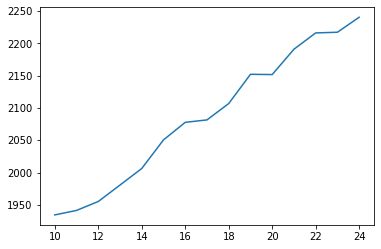

In [84]:
x = range(10, 25)
plt.plot(x, perplexity_values)
plt.show()

In [85]:
lda = LatentDirichletAllocation(n_components=19)
lda.fit(S_feat_vect)

display_topics(lda, feature_names, 20)

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic # 0
전방 충돌 lte 흐름 안전성 전송 공사 네이버 gv70 측면 인공 지능 현대 기아차 컨트롤 스마트 덕분 반복 vehicle 보행자 sk브로드밴드 광주 인기 검토
Topic # 1
정비 동물 mou 진화 led sk v2x 항공기 변속기 mbps 기계 활성화 채널 선언 헬스 케어 평창 클라우드 쌍용차 아이 충전소
Topic # 2
촬영 플레이 테스트 연료 대전 모양 요소 마력 최대 현대 마음 이벤트 최고 출력 계기 중앙 가정 세련 플러스 대책 서비스 이용 충격
Topic # 3
소형 추월 수단 연간 백신 전파 보안 연계 수도 쇼핑 솔루션 제공 솔루션 자율주행 자율 번째 제동 가속 항공 내부 참석 전면
Topic # 4
지정 요청 감소 개인정보 타입 차지 이동 통신 작업 대전 레벨 자율 구동 달성 과학기술정보통신부 부회장 서울시 아이오닉 전문가들 보급 완화 지속
Topic # 5
주행 보조 미납 통행료 공장 다운로드 수집 인구 경부고속도로 대처 이름 우버 경매 보안 소개 행사 기사 하늘 비행 지적 전기차 충전 자원
Topic # 6
반영 추세 번째 ktx 매장 항공기 장점 기록 쌍용차 전기차 충전 위성 추석 추월 날씨 한계 그룹 기계 주차 아마존 금융
Topic # 7
오프라인 지도 사망자 지방 지분 비중 애플 빅데이터 목적 감소 사물인터넷 트림 커버리지 오토파일럿 비전 독일 연구소 사물 사건 현상
Topic # 8
클러스터 방안 커피 누적 혜택 결정 kg 시승 오른쪽 리터 위반 점검 진동 마력 반영 시티 vr 톨게이트 주행보조 공식
Topic # 9
코란도 도달 레이더 활성 위성 온도 제약 원인 전년 부회장 연속 하늘 비율 감소제 북한 세단 배달 스마트카 이스라엘 자회사
Topic # 10
sns 싼타페 인상 택시 무선 블록체인 무게 편의성 신호 ceo skt 신차 보상 인수 40 운전자 보조 상반기 바람 휴대폰 자연
Topic # 11
좌석 현황 인공 승차감 테스트 가죽 광고 현지 테마 효율적 표현 국민 박차 정지 느낌 재난 발굴 목적 운용

### T(기술)

In [70]:
T_tokenized = [re.sub(',', ' ', T_df['키워드'][i]) for i in range(len(T_df))]
T_feat_vect = count_vectorizer.fit_transform(T_tokenized)

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [71]:
lda = LatentDirichletAllocation(n_components=6)
lda.fit(T_feat_vect)

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LatentDirichletAllocation(n_components=6)

In [72]:
# CountVectorizer객체내의 전체 word들의 명칭을 get_features_names( )를 통해 추출
feature_names = count_vectorizer.get_feature_names()

# Topic별 가장 연관도가 높은 word를 10개만 추출
display_topics(lda, feature_names, 20)

Topic # 0
가솔린 기아차 adas 제네시스 연비 아우디 스마트카 트림 하이브리드 솔루션 시트 느낌 신형 디스플레이 세단 버튼 고급 시승 기아 차체
Topic # 1
kt 결제 연휴 sk텔레콤 lte 점검 mbps 평균 품질 이용자 기지국 lg유플러스 경찰 넷플릭스 교통사고 요금 통행료 단속 트래픽 안내
Topic # 2
트럭 동물 현대모비스 방역 제조사 백신 의약품 영위 생석회 2019 제조 우주 테마 사업 영위 북한 위성 피해 동물 의약품 asf 예방
Topic # 3
도시 게임 콘텐츠 온라인 경제 과학 kt 혁명 삼성전자 교수 스타트업 사회 인간 vr 클라우드 선정 산업 혁명 일본 교육 ict
Topic # 4
테슬라 규제 주파수 애플 의료 대역 레벨 개인 정보 블록체인 대통령 경제 완전 자율 빅데이터 달러 가능성 구글 경매 정책 보호 병원
Topic # 5
드론 모빌리티 지도 택시 공급 현대차그룹 충전기 수소 수집 솔루션 에너지 레벨 모듈 미래차 ces 유럽 얼굴 충전소 올림픽 2025년


/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [86]:
perplexity_values = []

for i in tqdm.tqdm_notebook(range(10, 25)):
  ldamodel = LatentDirichletAllocation(n_components=i).fit(feat_vect).perplexity(T_feat_vect)
  perplexity_values.append(ldamodel)

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-86-b261ddd55712>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm.tqdm_notebook(range(10, 25)):


  0%|          | 0/15 [00:00<?, ?it/s]

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


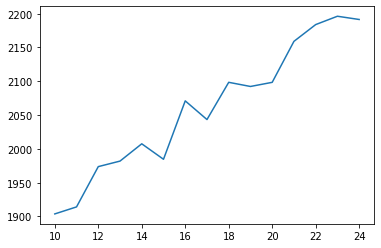

In [87]:
x = range(10, 25)
plt.plot(x, perplexity_values)
plt.show()

In [88]:
lda = LatentDirichletAllocation(n_components=20)
lda.fit(S_feat_vect)

display_topics(lda, feature_names, 20)

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic # 0
클러스터 반영 매장 할인 혜택 전기차 충전 iot 소독제 자동차 업체 오른쪽 설립 자금 입장 무게 주행보조 위성 자율주행 자율 시동 방안 40
Topic # 1
입장 자금 자동차 업체 드라이브 주차장 자동 변속기 자랑 완성 업체 완전 자율 사업 영위 뉴딜 사양 드라이빙 부회장 매장 개방 대한민국 코로나 운전대 국민
Topic # 2
프레스티지 대한민국 국토부 택시 편의성 ceo 무료 로보택시 skt 출력 마력 무상 등록 tv 장거리 자원 보상 중형 공조 납부 진출
Topic # 3
톨게이트 ktx 누적 트렁크 운전자 개입 스마트카 lg 현대자동차 문자 기지국 주도 배치 반영 연휴 대표적 정책 클러스터 다운로드 kt 트럭
Topic # 4
지도 지방 지분 건물 비중 목적 요청 독일 별도 애플 우버 건설 사물인터넷 사망자 커버리지 오토파일럿 네이버 신고 시험 광주
Topic # 5
동력 보안 소요 스타트업 ict 마지막 전면 충돌 방지 소독제 자동차 업체 택시 입장 설립 크루즈 컨트롤 버전 자금 나무 전면부 제동 제약
Topic # 6
연료 촬영 결정 레벨3 계기판 최고 출력 충격 표현 레이더 가죽 프리미엄 교육 느낌 점검 광고 라이다 연비 온도 마음 유튜브
Topic # 7
효율 플레이 현황 동의 번째 정지 현대 테스트 공기 구동 인도 가정 요소 대처 시동 의약품 작업 노블레스 비율 승차감
Topic # 8
기록 한계 방지 보조 먼지 발굴 한국도로공사 심사 전문 업체 카페 유통 자율주행 자율 정체 고도화 치료제 자유 나무 만족 스타일 이야기 예측
Topic # 9
소형 추월 수단 추세 연간 백신 보안 전파 연계 수도 쇼핑 장점 추석 솔루션 제공 항공 무게 자율주행 자율 솔루션 제동 번째
Topic # 10
미납 통행료 좌석 도요타 바이오 발견 제약 은행 제동 제도 영업 사운드 소개 포드 전면 버전 효율적 2025년 불법 우버 크루즈 컨트롤
Topic # 11
인도 공공 평소 학습 영화 활성 차로 하늘 수입 차선 변경 차별화 상반기 비율 무선 차